In [49]:
import numpy as np
import matplotlib.pyplot as plt
def graph(x,y):
    fig, ax = plt.subplots()
    ax.plot(x, y)

## Exercise 8.2: The Lotka–Volterra equations

The Lotka–Volterra equations are a mathematical model of predator–prey interactions between
biological species. Let two variables x and y be proportional to the size of the populations of
two species, traditionally called “rabbits” (the prey) and “foxes” (the predators). You could
think of x and y as being the population in thousands, say, so that x = 2 means there are 2000
rabbits. Strictly the only allowed values of x and y would then be multiples of 0.001, since you
can only have whole numbers of rabbits or foxes. But 0.001 is a pretty close spacing of values,
so it’s a decent approximation to treat x and y as continuous real numbers so long as neither
gets very close to zero.
In the Lotka–Volterra model the rabbits reproduce at a rate proportional to their popula-
tion, but are eaten by the foxes at a rate proportional to both their own population and the
population of foxes:

dx / dt = αx − βxy

where α and β are constants. At the same time the foxes reproduce at a rate proportional the
rate at which they eat rabbits—because they need food to grow and reproduce—but also die of
old age at a rate proportional to their own population:

dy / dt = γxy − δy,

where γ and δ are also constants.

a) Write a program to solve these equations using the fourth-order Runge–Kutta method for
the case α = 1, β = γ = 0.5, and δ = 2, starting from the initial condition x = y = 2.
Have the program make a graph showing both x and y as a function of time on the same
axes from t = 0 to t = 30. (Hint: Notice that the differential equations in this case do not
depend explicitly on time t—in vector notation, the right-hand side of each equation is a
function f (r) with no t dependence. You may nonetheless find it convenient to define a
Python function f(r,t) including the time variable, so that your program takes the same
form as programs given earlier in this chapter. You don’t have to do it that way, but it can
avoid some confusion. Several of the following exercises have a similar lack of explicit
time-dependence.)

b) Describe in words what is going on in the system, in terms of rabbits and foxes.

In [1]:
def cRK4(f, x0=0, v0=0, t0=0.0, tf=10.0, dt=2**-5):
    r = np.array([x0,v0], float) #init conditions

    tpoints = np.arange(t0,tf,dt)
    xpoints = []
    vpoints = []

    for t in tpoints:
        xpoints.append(r[0])
        vpoints.append(r[1])
        k1 = dt*f(r,t)
        k2 = dt*f(r+0.5*k1, t+0.5*dt)
        k3 = dt*f(r+0.5*k2, t+0.5*dt)
        k4 = dt*f(r+0.5*k3, t+0.5*dt)
        r = r + (k1+2*k2+2*k3+k4)/6
    
    return tpoints, xpoints, vpoints

In [58]:
def cRK4_xyz(f, x0=0, y0=0, z0=0, t0=0.0, tf=10.0, dt=2**-5):
    r = np.array([x0,y0,z0], float) #init conditions

    tpoints = np.arange(t0,tf,dt)
    xpoints = []
    ypoints = []
    zpoints = []

    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        zpoints.append(r[2])
        k1 = dt*f(r,t)
        k2 = dt*f(r+0.5*k1, t+0.5*dt)
        k3 = dt*f(r+0.5*k2, t+0.5*dt)
        k4 = dt*f(r+0.5*k3, t+0.5*dt)
        r = r + (k1+2*k2+2*k3+k4)/6
    
    return tpoints, xpoints, ypoints, zpoints

In [15]:
def population(r,t):
    x = r[0]
    y = r[1]
    a = 1
    b = .5
    g = .5
    o = 2

    fx = a*x - b*x*y
    fy = g*x*y - o*y
    return np.array([fx, fy], float)
# in order for object to float, force of boyancy (c1) > grav + c2

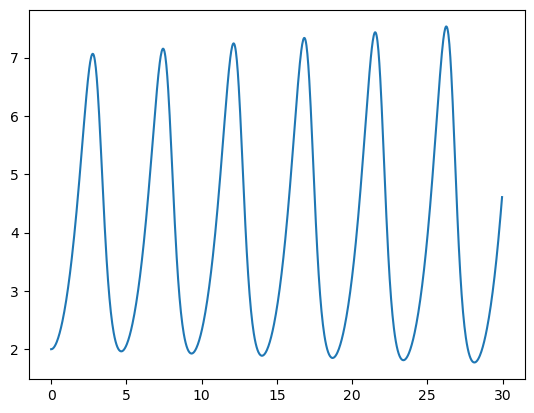

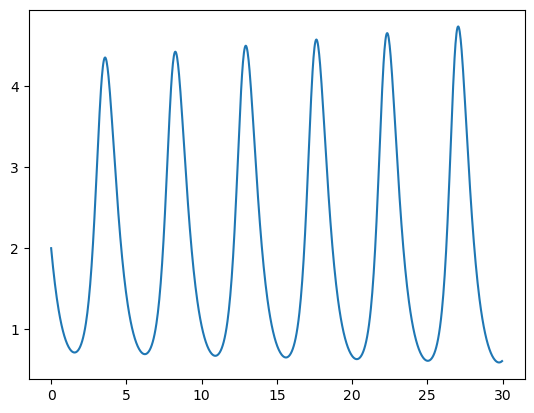

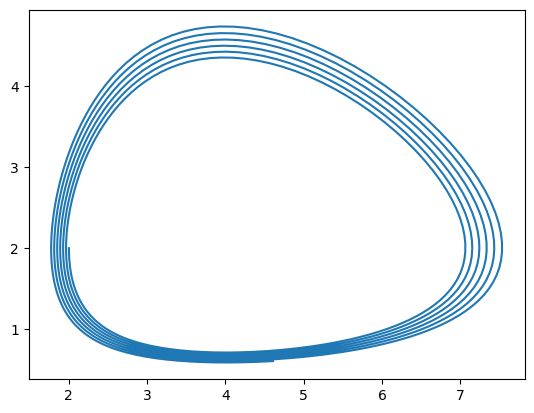

In [53]:
t,x,y = cRK4_xy(population, x0=2, y0=2, tf=30)
graph(t,x)
graph(t,y)
graph(x,y)


## Exercise 8.3: The Lorenz equations
One of the most celebrated sets of differential equations in physics is the Lorenz equations:

dx/dt = σ(y − x), 

dy/dt = rx − y − xz, 

dz/dt = xy − bz,

where σ, r, and b are constants. (The names σ, r, and b are odd, but traditional—they are always
used in these equations for historical reasons.)
These equations were first studied by Edward Lorenz in 1963, who derived them from a
simplified model of weather patterns. The reason for their fame is that they were one of the
first incontrovertible examples of deterministic chaos, the occurrence of apparently random mo-
tion even though there is no randomness built into the equations. We encountered a different
example of chaos in the logistic map of Exercise 3.6.

a) Write a program to solve the Lorenz equations for the case σ = 10, r = 28, and b = 8/3 
in the range from t = 0 to t = 50 with initial conditions (x, y, z) = (0, 1, 0). Have your
program make a plot of y as a function of time. Note the unpredictable nature of the
motion. (Hint: If you base your program on previous ones, be careful. This problem has
parameters r and b with the same names as variables in previous programs—make sure
to give your variables new names, or use different names for the parameters, to avoid
introducing errors into your code.)

b) Modify your program to produce a plot of z against x. You should see a picture of the
famous “strange attractor” of the Lorenz equations, a lop-sided butterfly-shaped plot that
never repeats itself.

In [43]:
def lorenz(not_r,t):
    x = not_r[0]
    y = not_r[1]
    z = not_r[2]
    o = 10
    r = 28
    b = 8/3

    fx = o*(y - x)
    fy = r*x - y - x*z
    fz = x*y - b*z
    return np.array([fx, fy, fz], float)
# in order for object to float, force of boyancy (c1) > grav + c2

In [58]:
def cRK4_xyz(f, x0=0, y0=0, z0=0, t0=0.0, tf=10.0, dt=2**-5):
    r = np.array([x0,y0,z0], float) #init conditions

    tpoints = np.arange(t0,tf,dt)
    xpoints = []
    ypoints = []
    zpoints = []

    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        zpoints.append(r[2])
        k1 = dt*f(r,t)
        k2 = dt*f(r+0.5*k1, t+0.5*dt)
        k3 = dt*f(r+0.5*k2, t+0.5*dt)
        k4 = dt*f(r+0.5*k3, t+0.5*dt)
        r = r + (k1+2*k2+2*k3+k4)/6
    
    return tpoints, xpoints, ypoints, zpoints

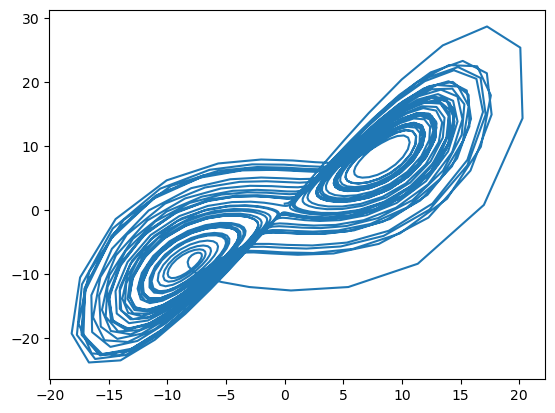

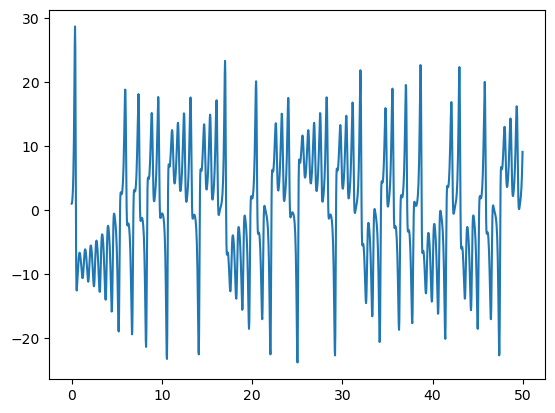

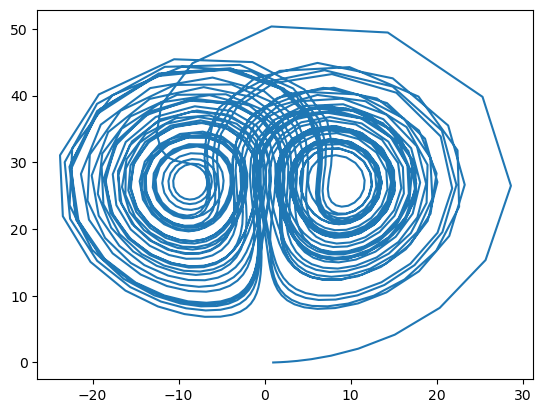

In [59]:
t,x,y,z = cRK4_xyz(lorenz, y0=1, tf=50)
graph(x,y)
graph(t,y)
graph(y,z)